<a href="https://colab.research.google.com/github/aleksandraangelova/colab_demo_2023/blob/main/spark101_demo_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Spark 101

## What is Spark?

The golden standard powering a modern Big Data Platform, Spark is a multi-language engine for executing data engineering, data science, and machine learning on single-node machines or clusters.


## Spark Application Architecture

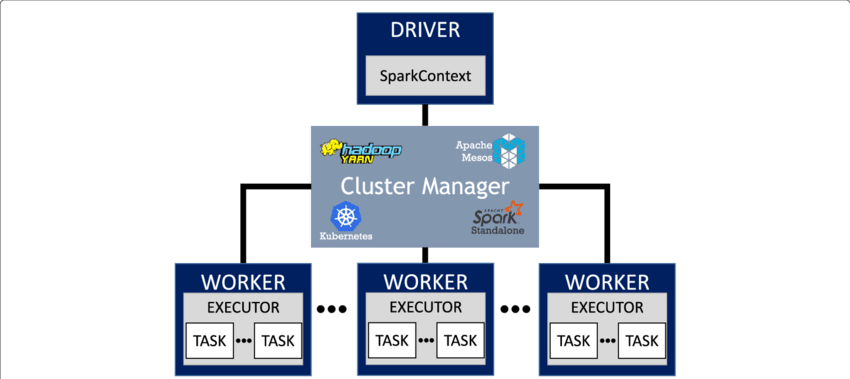

The power behind Spark is distributed computing. A Spark application consists of a Driver Node which controls the execution of tasks and their distribution to the executor nodes which actually perform the calculations. 

The job of the Driver is to keep track of all running tasks on all executors and to allocate the tasks to the workers based on the available resources. 

Spark's power lies in its core abstraction - the RDD (resilient distributed dataset). The RDD is an "immutable distributed collections of objects of any type" which are located on multiple data nodes. 

The RDD is split between the different nodes which allows parallel processing. 

# Configuration

## Install Spark and set it up

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://www.apache.org/dist/spark/spark-3.2.3/spark-3.2.3-bin-hadoop3.2.tgz 

In [ ]:
!tar xf spark-3.2.3-bin-hadoop3.2.tgz

In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.3-bin-hadoop3.2"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import findspark
findspark.init()

## Inside a typical Spark application

A typical Spark application begins with the initialization of a Spark Session which initiates a SparkContext. The SparkContext makes the connection between the Spark Application Driver and the cluster. 

Unless you work with Databricks where a Spark Session is available by default in the notebooks, you will need to initate the Spark Session yourself.

Spark can work in 3 modes:

*   local
*   client
*   cluster

### Local mode

In local mode the application is running entirely on one node. The driver and the executors are just running on different threads and this is how parallelization is achieved. 

This mode is mainly used for local development and does not allow for much scaling. You are limited to the resources of your machine. 

### Client mode 
When in client mode, the Spark driver is located on the machine from which you are launching your application, while the executors can be anywhere else in the cluster. This is useful when you need to load configuration files from your machine. Remember that all files/apps do not "magically" appear everywhere but have to be deployed there somehow, so that's why it's important to know the differences between these regimes. 

### Cluster mode
In cluster mode, both the driver and the executors can be located anywhere on the cluster. 



💡 The following questions can help you with any troubleshooting:

1.   "Where is my code executed?"
2.   "Where is my data?"
3.   "What is the path to my resources?"




In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

### Get spark session details

In [ ]:
spark

# Mount your Google Drive to get access to all your files

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


### Take a look at the list of grocery items that you've uploaded.

In [ ]:
#TODO
# remember to specify header and delimiter

grocery_items = (
  spark
  .read
  .format("csv")
  .option("header", "true")
  .option("delimiter", ";")
  .load("/content/gdrive/MyDrive/colab_demo/Grocery_UPC_Database.csv")
    )

### Spark's lazy nature
A typical Spark application loads data from a data source, transforms it into an RDD and continues with some action. 

Whenever we tell Spark to read a file, it actually just generates an action plan for how exactly to implement certain transformations (join, map, groupBy, etc.). However, it does not actually execute it until an action is called (count, show, collect, etc.) The data is loaded when we call an action. 

Spark's lazy execution also contributes to its efficiency. The transformations are simply a step in a logical plan and each executor is aware of this plan. 

Therefore, the first thing that happens is the generation of this logical plan. At this stage Spark does not even check the metadata (column names, formats, etc.) It does so at the next step - when it generates a resolved logical plan. 

In [ ]:
grocery_items.count()

103396

# Examine the data

In [ ]:
grocery_items.show(10, truncate=False)

+------+--------------+------------+------------------+-----------------------------------------------------------+
|grp_id|upc14         |upc12       |brand             |name                                                       |
+------+--------------+------------+------------------+-----------------------------------------------------------+
|1     |00035200264013|035200264013|Riceland          |Riceland American Jazmine Rice                             |
|2     |00011111065925|011111065925|Caress            |Caress Velvet Bliss Ultra Silkening Beauty Bar             |
|3     |00023923330139|023923330139|Earth's Best      |Earth's Best Organic Fruit Yogurt Smoothie Mixed Berry     |
|4     |00208528800007|208528800007|Boar's Head       |Boar's Head Sliced White American Cheese                   |
|5     |00759283100036|759283100036|Back To Nature    |Back To Nature Gluten Free White Cheddar Rice Thin Crackers|
|6     |00074170388732|074170388732|Sally Hansen      |Sally Hansen Nail

Generate some descriptive statistics of the data

In [ ]:
#TODO
grocery_items.describe().show()

+-------+-----------------+--------------------+--------------------+------------------+--------------------+
|summary|           grp_id|               upc14|               upc12|             brand|                name|
+-------+-----------------+--------------------+--------------------+------------------+--------------------+
|  count|           103396|              103396|              103396|            103396|              103396|
|   mean|62508.87906688847|3.387014191361399E11|3.022396604607564E11|             180.5|                null|
| stddev|40018.05627202283|7.710390196372052E11|3.374838495657711E11|374.61324884058297|                null|
|    min|                1|      00000000000000|        000000000000|    "Double ""q"""|"15"" Green Cardi...|
|    max|            99999|      90073981323799|        997500000223|           Zzzquil|dirty Sour Cream ...|
+-------+-----------------+--------------------+--------------------+------------------+--------------------+



In [ ]:
grocery_items.summary().show()

+-------+-----------------+--------------------+--------------------+------------------+--------------------+
|summary|           grp_id|               upc14|               upc12|             brand|                name|
+-------+-----------------+--------------------+--------------------+------------------+--------------------+
|  count|           103396|              103396|              103396|            103396|              103396|
|   mean|62508.87906688847|3.387014191361399E11|3.022396604607564E11|             180.5|                null|
| stddev|40018.05627202283|7.710390196372052E11|3.374838495657711E11|374.61324884058297|                null|
|    min|                1|      00000000000000|        000000000000|    "Double ""q"""|"15"" Green Cardi...|
|    25%|          27374.0|     4.1420102523E10|     4.1351518301E10|               5.0|                null|
|    50%|          54924.0|     7.4471018024E10|     7.4300378459E10|               5.0|                null|
|    75%| 

# Which brand has the most products in our data frame

In [ ]:
from pyspark.sql import functions as F

#TODO
# group by the brand and count

(
    grocery_items
    .groupBy("brand")
    .agg(F.count("*").alias("total_products"))
    .orderBy(F.col("total_products").desc())
    .show()
)

+----------------+--------------+
|           brand|total_products|
+----------------+--------------+
|           Ahold|          3480|
|         Careone|          1101|
|          Roland|           634|
|Nature's Promise|           485|
|       Mccormick|           463|
|    Smart Living|           424|
|    Sally Hansen|           423|
|       Companion|           404|
|           Goody|           403|
|   Betty Crocker|           352|
|           Kraft|           325|
|          Gerber|           315|
|  Sports Tissues|           294|
|    Nature's Way|           281|
|      Aura Cacia|           279|
|            Goya|           272|
|    Manischewitz|           261|
|         Twinlab|           248|
| Nature's Answer|           240|
|      Herb Pharm|           236|
+----------------+--------------+
only showing top 20 rows



# Dataset Deep Dive

## What are the products of the top brand in the data set?


In [ ]:
(
    grocery_items
    .filter("brand = 'Ahold'")
    .show(20, truncate=False)
)

+------+--------------+------------+-----+----------------------------------------------+
|grp_id|upc14         |upc12       |brand|name                                          |
+------+--------------+------------+-----+----------------------------------------------+
|10    |00688267141676|688267141676|Ahold|Ahold Cocoa Almonds                           |
|63    |00688267038693|688267038693|Ahold|Ahold  Honey Mustard                          |
|65    |00688267078491|688267078491|Ahold|Ahold Complete Buttermilk Pancake & Waffle Mix|
|80    |00688267130434|688267130434|Ahold|Ahold Premium Paper Towels Giant Rolls        |
|107   |00688267123580|688267123580|Ahold|Ahold Cooked Shrimp Large Tail                |
|137   |00688267136252|688267136252|Ahold|Ahold 5 Cheese Pizza Ready To Bake            |
|163   |00688267132667|688267132667|Ahold|Ahold Cocoa Magic Cereal                      |
|185   |00237194000008|237194000008|Ahold|Ahold Honey Ham                               |
|186   |00

### Task: Can you count the number of records in one of the sample files provided by Google Colab in the sample_data folder? 

Hint: Delimiter is ','

In [ ]:
#TODO

# Data load and summary

In [ ]:
## Random forest regressor 
from pyspark.sql import functions as F
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator


''' Dataset Information :

    Input fields :
      Longitude: East/west measurement, a higher value is further west.
      Latitude: North/south measurement, a higher value is further north.
      Housing Median Age: Median age of a house within a block, lower is newer.
      Total Rooms: Total number of rooms within a block.
      Total Bedrooms: Total number of bedrooms within a block.
      Population: Total number of people residing within a block.
      Households: Total number of households in a block.
      Median Income: Median income for households within a block of houses (measured in tens of thousands of dollars).
      Median House Value: Median house value (in thousands of dollars) for households within a block.

    Created fields :
      In order to make some of the features more relevant for predicting the 
      median house value, instead of using the totals the following ratios are 
      created: 
          - rooms per house=total rooms/households
          - people per house=population/households
          - bedrooms per rooms=total bedrooms/total rooms. 

    Label/target column : "median_house_value"
    Features : {"median age", "median income", "rooms per house", "population per house", "bedrooms per room", "longitude", "latitude" }
'''

# Load and parse the data file, converting it to a DataFrame.
train_df= spark.read.csv(path="/content/sample_data/california_housing_train.csv", 
                         inferSchema=True, header=True)

test_df = spark.read.csv(path="/content/sample_data/california_housing_test.csv", 
                         inferSchema=True, header=True)

california_housing_df = train_df.union(test_df.select(train_df.columns))

# Create additional features
california_housing_df = california_housing_df.withColumn("rooms_per_house", F.col("total_rooms") / F.col("households"))
california_housing_df = california_housing_df.withColumn("pop_per_house", F.col("population") / F.col("households"))
california_housing_df = california_housing_df.withColumn("bedrooms_per_house", F.col("total_bedrooms") / F.col("total_rooms"))

california_housing_df=california_housing_df.drop("total_rooms", "households", "population" , "total_bedrooms")

In [ ]:
# Dataframe statistics 
# check schema
print("Schema california_housing_df : ")
print(california_housing_df.printSchema())

Schema california_housing_df : 
root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housing_median_age: double (nullable = true)
 |-- median_income: double (nullable = true)
 |-- median_house_value: double (nullable = true)
 |-- rooms_per_house: double (nullable = true)
 |-- pop_per_house: double (nullable = true)
 |-- bedrooms_per_house: double (nullable = true)

None


In [ ]:
# row count
print("Row count california_housing_df : ", california_housing_df.count())

Row count california_housing_df :  20000


In [ ]:
# display one row of the train/test data 
print("Display one row of the california_housing_df : ")
print(california_housing_df.limit(1).show())

Display one row of the california_housing_df : 
+---------+--------+------------------+-------------+------------------+------------------+------------------+-------------------+
|longitude|latitude|housing_median_age|median_income|median_house_value|   rooms_per_house|     pop_per_house| bedrooms_per_house|
+---------+--------+------------------+-------------+------------------+------------------+------------------+-------------------+
|  -114.31|   34.19|              15.0|       1.4936|           66900.0|11.889830508474576|2.1504237288135593|0.22861724875267284|
+---------+--------+------------------+-------------+------------------+------------------+------------------+-------------------+

None


In [ ]:
# check Pearson correlation between median_house_value and median_income
california_housing_df.select(F.corr("median_house_value", "median_income")).show()

+---------------------------------------+
|corr(median_house_value, median_income)|
+---------------------------------------+
|                     0.6891094729577227|
+---------------------------------------+



# Model training 

In [ ]:
# Step 1 : Feature Extraction and Pipelining 
############################################
from pyspark.ml.feature import VectorAssembler

feature_columns = [
                   'longitude',
                   'latitude',
                   'housing_median_age',
                   'median_income',
                   'rooms_per_house',
                   'pop_per_house',
                   'bedrooms_per_house'
]

# VectorAssembler is transformer that merges multiple columns into a vector column.
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
california_housing_df = assembler.transform(california_housing_df)
california_housing_df.limit(1).show(1, False)

+---------+--------+------------------+-------------+------------------+------------------+------------------+-------------------+-------------------------------------------------------------------------------------+
|longitude|latitude|housing_median_age|median_income|median_house_value|rooms_per_house   |pop_per_house     |bedrooms_per_house |features                                                                             |
+---------+--------+------------------+-------------+------------------+------------------+------------------+-------------------+-------------------------------------------------------------------------------------+
|-114.31  |34.19   |15.0              |1.4936       |66900.0           |11.889830508474576|2.1504237288135593|0.22861724875267284|[-114.31,34.19,15.0,1.4936,11.889830508474576,2.1504237288135593,0.22861724875267284]|
+---------+--------+------------------+-------------+------------------+------------------+------------------+-------------------+--

In [ ]:
# Step 2 : RandomSplit of the data
############################################
print("Caching : ", california_housing_df.cache().count())

train_df, test_df = california_housing_df.randomSplit([0.8, 0.2], seed=42)
print(train_df.count(), test_df.count())

# ! Spark RandomSplit : https://medium.com/udemy-engineering/pyspark-under-the-hood-randomsplit-and-sample-inconsistencies-examined-7c6ec62644bc

Caching :  20000
16088 3912


In [ ]:
# Step 3 : Train a RandomForest model.
############################################
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestRegressor(featuresCol="features", labelCol="median_house_value")
rfModel = rf.fit(train_df)

predictions = rfModel.transform(test_df)
predictions.select(feature_columns + ['median_house_value', 'prediction']).show(25)

+---------+--------+------------------+-------------+------------------+------------------+-------------------+------------------+------------------+
|longitude|latitude|housing_median_age|median_income|   rooms_per_house|     pop_per_house| bedrooms_per_house|median_house_value|        prediction|
+---------+--------+------------------+-------------+------------------+------------------+-------------------+------------------+------------------+
|   -124.3|   41.84|              17.0|       3.0313| 5.870614035087719|2.7280701754385963|0.19835636906985432|          103600.0|122452.32760499332|
|  -124.23|   40.54|              52.0|       3.0806|6.1931034482758625|2.6482758620689655|0.16815144766146994|          106700.0|142829.54999215907|
|  -124.23|   41.75|              11.0|       2.4805|6.5949895615866385|2.8037578288100207|0.19499841722063943|           73200.0| 106964.6139179349|
|  -124.19|   40.73|              21.0|       3.5363|5.8580246913580245| 2.990740740740741|0.1854583

In [ ]:
# Step 4 : Model evaluation
############################################

def compute_RMSE(df, predicted_col, actual_col):
  rmse = (df
    .withColumn("squarederror", F.pow(F.col(actual_col) - F.col(predicted_col), F.lit(2)))
    .groupby()
    .agg(F.avg(F.col("squarederror")).alias("mse"))
    .withColumn("rmse", F.sqrt(F.col("mse")))
    )
  return rmse


print(compute_RMSE(df=predictions, predicted_col="prediction", actual_col="median_house_value").show())

+-------------------+-----------------+
|                mse|             rmse|
+-------------------+-----------------+
|4.826553910177673E9|69473.40433703874|
+-------------------+-----------------+

None


In [ ]:
# Step 5 : Baseline prediction
############################################
avg_pred = predictions.groupBy().agg(F.avg('median_house_value').alias('avg_prediction')).rdd.flatMap(lambda x: x).collect()[0]
predictions = predictions.withColumn('avg_prediction', F.lit(avg_pred))
predictions.show(1)
print(compute_RMSE(df=predictions, predicted_col="avg_prediction", actual_col="median_house_value").show())


+---------+--------+------------------+-------------+------------------+-----------------+------------------+-------------------+--------------------+------------------+------------------+
|longitude|latitude|housing_median_age|median_income|median_house_value|  rooms_per_house|     pop_per_house| bedrooms_per_house|            features|        prediction|    avg_prediction|
+---------+--------+------------------+-------------+------------------+-----------------+------------------+-------------------+--------------------+------------------+------------------+
|   -124.3|   41.84|              17.0|       3.0313|          103600.0|5.870614035087719|2.7280701754385963|0.19835636906985432|[-124.3,41.84,17....|122452.32760499332|207326.70782208588|
+---------+--------+------------------+-------------+------------------+-----------------+------------------+-------------------+--------------------+------------------+------------------+
only showing top 1 row

+--------------------+---------